# Task 1  

## General instructions

First, update the following text to have a link to your Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/floraham/eds220-homework-3.git

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now. Points will be deducted for insufficient comments.


## About the data
In this task you will use two datsets:

**First dataset**

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the 'NYSDEC_SpillIncidents_Overview.pdf' and 'NYSDEC_SpillIncidents_DataDictionary.pdf' documents available at the portal.

You can access this datset via its URL or download it as a csv. 
If you chose to access it via URL, it will take a while to load every time you import it. 

**Second dataset**

The second dataset is a [TIGER shapefile from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). 
For this task you will need to **download the 2022 counties (and equivalent) TIGER shapefile**. 
You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 



## File management
Make sure all your data files are inside a directory named 'data' inside your repository's directory (working directory).

## Datasets description
Read the metadata for both datsets and write a brief description about each once. Indicate the date sources and date of access.


## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

In [490]:
### ===== FINAL CODE =====

<!-- write your description in this markdwon cell -->

## Import libraries

In [3]:
# import libraries here
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# import numpy too
import numpy as np

## Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties shapefile as a variable named `counties`.


<AxesSubplot:>

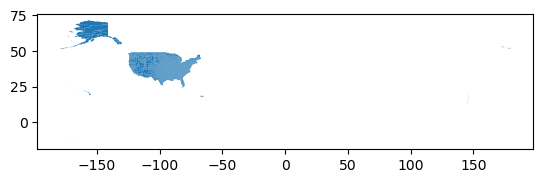

In [5]:
# import spills and counties data

spills = pd.read_csv('~/EDS220/eds-220-hwk3/data/Spill_Incidents_20231106.csv')


counties = gpd.read_file('~/EDS220/eds-220-hwk3/data/tl_2022_us_county2/tl_2022_us_county.shp')
counties.plot()


## Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the unique values in the `material_family` column
5. Check the unique values in the `county` column

You can add any other cells of preliminary data exploration.

In [116]:
# 1.checking spill data frame head
spills.head(5)

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [117]:
# 2.  Simplify column names as needed
spills.columns = spills.columns.str.lower()
spills.columns = spills.columns.str.replace(" ", "_")
spills.spill_date = pd.to_datetime(spills.spill_date)
spills.close_date = pd.to_datetime(spills.close_date)
spills.received_date = pd.to_datetime(spills.received_date)


In [118]:
# 3. Check the data types of the columns
spills.dtypes

spill_number                      int64
program_facility_name            object
street_1                         object
street_2                         object
locality                         object
county                           object
zip_code                         object
swis_code                         int64
dec_region                        int64
spill_date               datetime64[ns]
received_date            datetime64[ns]
contributing_factor              object
waterbody                        object
source                           object
close_date               datetime64[ns]
material_name                    object
material_family                  object
quantity                        float64
units                            object
recovered                       float64
dtype: object

In [119]:
# 4. Check the unique values in the `material_family` column
spills.material_family.unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [120]:
# 5. Check the unique values in the `county` column
spills.county.unique()


array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex', 'Chenango',
       'Erie', 'Livingston', 'Wayne', 'Suffolk', 'Orleans', 'Ontario',
       'Genesee', 'Otsego', 'Tompkins', 'Madison', 'Chemung', 'Seneca',
       'Oneida', 'Broome', 'Hamilton', 'Washington', 'Schuyler',
       'Franklin', 'Columbia', 'Fulton', 'Herkimer', 'Schoharie',
       'Rensselaer', 'Montgomery', 'Putnam', 'Delaware',
       'New Jersey - Region 2', 'Steuben', 'Tioga', 'Chautauqua',
       'Cattaraugus', 'Wyoming', 'Yates', 'Greene',
       'Pennsylvania - Region 9', 'Allegany', 'New Jersey - Region 3 (N)',
       'Cattaraugus Indian Reservation', 'New Jersey - Region 3 (T)',
       'Canada - Region 6', 'Canada - Region 9',
       '

### Data selection

1. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells if you needed.

In [121]:
# select petroleum spills between 1/1/29 and 10/31/23. Store in variable named petr_23 

petr_23 = spills[(spills.material_family == "Petroleum") & (spills.spill_date >= "01-01-2023") & (spills.spill_date <= "10-31-2023")].copy()
petr_23


,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
220,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,#2 fuel oil,Petroleum,0.0,Gallons,0.0
221,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,"used oil (heating, on-site consumption)",Petroleum,0.0,NaN,0.0
222,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,#2 fuel oil (on-site consumption),Petroleum,0.0,NaN,0.0
223,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,Diesel (E-Gen),Petroleum,0.0,NaN,0.0
225,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,waste oil/used oil,Petroleum,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541791,2208600,ZHANG RESIDENCE,11 ACORN LANE,NaN,STONY BROOK,Suffolk,NaN,5222,1,2023-01-22,2023-01-22,Equipment Failure,NaN,Private Dwelling,2023-01-31,#2 fuel oil,Petroleum,5.0,Gallons,0.0
541794,2303072,ZHANG RESIDENCE,93 CHERRY LANE,NaN,HICKSVILLE,Nassau,NaN,3024,1,2023-07-14,2023-07-14,Equipment Failure,NaN,Private Dwelling,2023-09-18,#2 fuel oil,Petroleum,0.0,NaN,0.0
541904,2208304,ZIMMERMAN - UST,19 MOUNTAIN AVENUE,NaN,LARCHMONT,Westchester,NaN,6032,3,2023-01-10,2023-01-10,Equipment Failure,NaN,Private Dwelling,NaT,#2 fuel oil,Petroleum,0.0,NaN,0.0
542187,2301301,ZULTOWSKY - UST,514 PELHAM MANOR RD,NaN,PELHAM,Westchester,NaN,6044,3,2023-05-16,2023-05-16,Equipment Failure,NaN,Private Dwelling,2023-07-11,#2 fuel oil,Petroleum,0.0,NaN,0.0


2. Verify that `petr_23` only has data for petroleum spills 

In [122]:
# your code here
petr_23.material_family.unique()

array(['Petroleum'], dtype=object)

3. Verify that `petr_23` only has data for 2023. 
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`

In [123]:
# your code here

petr_23.spill_date.dt.year.unique()


array([2023])

4. Verify that `petr_23` only has data from January to October. 

In [124]:
# your code here
petr_23.spill_date.dt.month.unique()

array([ 6,  8,  9,  7,  1,  2,  3, 10,  5,  4])

### Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if you needed.

In [125]:
# spills per county from jan to october 2023 (petr_23) 

petr_23.spill_number = petr_23.spill_number.astype("str")


n_spills = petr_23.groupby("county").nunique().spill_number.reset_index()

spills_per_county = n_spills.rename(columns={'spill_number':'n_spills'})
spills_per_county


,county,n_spills
0,Albany,198
1,Allegany,29
2,Bronx,133
3,Broome,69
4,Cattaraugus,43
...,...,...
59,Washington,94
60,Wayne,36
61,Westchester,717
62,Wyoming,24


## Prepare counties data

This section refers to the `counties` geodataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the geo-dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the geo-dataframe's CRS
5. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [126]:
# check geo-dataframe's head
counties



,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,None,None,None,A,2169272978,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,13,123,00351260,13123,Gilmer,Gilmer County,06,H1,G4020,None,None,None,A,1103893380,12276629,+34.6905232,-084.4548113,"POLYGON ((-84.30237 34.57832, -84.30329 34.577..."
3231,27,135,00659513,27135,Roseau,Roseau County,06,H1,G4020,None,None,None,A,4329793477,16913514,+48.7610683,-095.8215042,"POLYGON ((-95.25857 48.88666, -95.25707 48.885..."
3232,28,089,00695768,28089,Madison,Madison County,06,H1,G4020,None,None,None,A,1850178077,71698127,+32.6343703,-090.0341603,"POLYGON ((-90.14883 32.40026, -90.14890 32.400..."
3233,48,227,01383899,48227,Howard,Howard County,06,H1,G4020,None,None,None,A,2333039143,8841781,+32.3034298,-101.4387208,"POLYGON ((-101.18138 32.21252, -101.18138 32.2..."


In [127]:
# 2. 
counties.columns = counties.columns.str.lower()


In [128]:
# 3. 
counties.dtypes

statefp       object
countyfp      object
countyns      object
geoid         object
name          object
namelsad      object
lsad          object
classfp       object
mtfcc         object
csafp         object
cbsafp        object
metdivfp      object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

In [129]:
# 4.  Check the geo-dataframe's CRS

counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

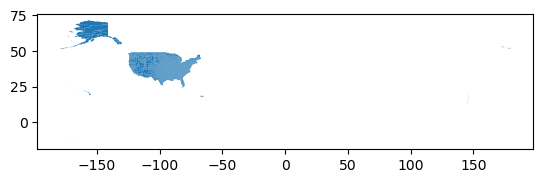

In [130]:
# 5. Plot the geo-dataframe.

counties.plot()


### Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them. HINT: to find which counties correspond to NY, look at the metadata.

In [131]:
# your code here

ny_counties = counties[(counties.statefp == "36")].copy()
ny_counties.head()
ny_counties_map = counties[(counties.statefp == "36")].copy()


## Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### Explore data

In the next cells:

1. Print the names of counties in `ny_counties`, without repetition.
2. Print the names of counties in `spills_per_county`, without repetition. (Do you notice anything?)
3. Use the [`numpy` function `setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html) to find the county names that are in `spills_per_county`, but not in `ny_counties`. HINT: pay attention to the example in the documentation.
4. Find the county names that are in `ny_counties`, but not in `spills_per_county`.
5. Check the number of spills in 'Tuscarora Indian Reservation'.


In [132]:
# 1. Print the names of counties in ny_counties, without repetition.

ny_counties.name.unique()

array(['Steuben', 'Saratoga', 'Allegany', 'Oswego', 'Ulster',
       'St. Lawrence', 'Schuyler', 'Essex', 'Suffolk', 'Hamilton',
       'Dutchess', 'Otsego', 'Tompkins', 'Albany', 'Cayuga', 'Greene',
       'Herkimer', 'Warren', 'Jefferson', 'Clinton', 'Nassau', 'Madison',
       'Washington', 'Westchester', 'Lewis', 'Ontario', 'Cortland',
       'Richmond', 'Erie', 'Putnam', 'Montgomery', 'Sullivan', 'Orleans',
       'Oneida', 'Cattaraugus', 'Yates', 'Tioga', 'Monroe', 'Schoharie',
       'Broome', 'Rensselaer', 'Seneca', 'Queens', 'Genesee', 'Wayne',
       'Niagara', 'Kings', 'Chemung', 'Wyoming', 'New York', 'Columbia',
       'Chautauqua', 'Franklin', 'Onondaga', 'Chenango', 'Fulton',
       'Rockland', 'Livingston', 'Delaware', 'Orange', 'Schenectady',
       'Bronx'], dtype=object)

In [133]:
# 2. Print the names of counties in spills_per_county, without repetition. 

spills_per_county.county.unique()

#(Do you notice anything?)
# There's quite a lot of overlap. 

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New Jersey - Region 2', 'New York', 'Niagara', 'Oneida',
       'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego',
       'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland',
       'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca',
       'St Lawrence', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga',
       'Tompkins', 'Tuscarora Indian Reservation', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

In [134]:
# 3. Use the numpy function setdiff1d() to find the county names that are in spills_per_county, but not in ny_counties. HINT: pay attention to the example in the documentation.

np.setdiff1d(spills_per_county.county.unique(), ny_counties.name.unique()) 


array(['New Jersey - Region 2', 'St Lawrence',
       'Tuscarora Indian Reservation'], dtype=object)

In [135]:
# 4. Find the county names that are in ny_counties, but not in spills_per_county.

np.setdiff1d(ny_counties.name.unique(), spills_per_county.county.unique()) 

array(['St. Lawrence'], dtype=object)

In [136]:
# 5. Check the number of spills in 'Tuscarora Indian Reservation'.
spills_per_county[spills_per_county.county == "Tuscarora Indian Reservation"]

,county,n_spills
56,Tuscarora Indian Reservation,1


### Data updates

In this section we will update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame.

In the next cells:
1. Check the row in `spills_per_county` that has 'St Lawrence'
2. Run the code and read the explanation in the comments
3. Run the code and read the explanation in the comments
4. Use the `st_lawrence_index` and `at` to update St Lawrence name in `spills_per_county` dataframe
5. Check the update was successfull

In [137]:
# 1.  

spills_per_county[spills_per_county.county == "St Lawrence"]

,county,n_spills
50,St Lawrence,62


In [138]:
# 2. we can get the index of that single row like this, to access the actual row index...
spills_per_county[spills_per_county.county=='St Lawrence'].index

Int64Index([50], dtype='int64')

In [139]:
# 3. we need to select the first item in that tuple using [0]
st_lawrence_index = spills_per_county[spills_per_county.county=='St Lawrence'].index[0]
st_lawrence_index

50

In [140]:
# 4. 
spills_per_county.at[st_lawrence_index, "county"] = "St. Lawrence"




In [141]:
spills_per_county.iloc[50]

county      St. Lawrence
n_spills              62
Name: 50, dtype: object

### Merge

In the following cells:
1. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 
2. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.

From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

3. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

<AxesSubplot:>

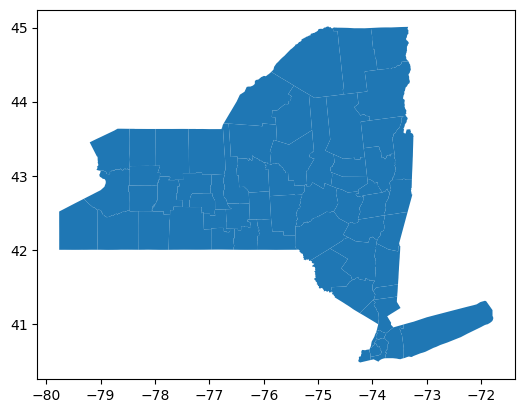

In [143]:
# 1. 
ny_counties.rename(columns={'name': 'county'}, inplace = True)
ny_counties.plot()

In [144]:
# 2. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.
#From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

ny_counties = pd.merge(spills_per_county, ny_counties, 
                     how = 'inner', 
                     on = 'county')


AttributeError: 'DataFrame' object has no attribute 'crs'

In [96]:
# 3. Since the Tuscarora Indian Reservation does not appear in the ny_counties dataframe, 
#add one spill to Niagara county. We will add a note about this in our final map. 
#Add the cells you need to make this update and verify that the dataframe was updated.
ny_counties
#ny_counties.dtypes
niagara_index = ny_counties[ny_counties.county=='Niagara'].index[0]


ny_counties.iloc[niagara_index]




county                                                Niagara
n_spills                                                   88
statefp                                                    36
countyfp                                                  063
countyns                                             00974130
geoid                                                   36063
namelsad                                       Niagara County
lsad                                                       06
classfp                                                    H1
mtfcc                                                   G4020
csafp                                                    None
cbsafp                                                   None
metdivfp                                                 None
funcstat                                                    A
aland                                              1352887560
awater                                             1598842379
intptlat

In [97]:
# adding one spill to Niagara 
ny_counties.at[niagara_index, 'n_spills'] += 1
ny_counties.iloc[niagara_index]

county                                                Niagara
n_spills                                                   89
statefp                                                    36
countyfp                                                  063
countyns                                             00974130
geoid                                                   36063
namelsad                                       Niagara County
lsad                                                       06
classfp                                                    H1
mtfcc                                                   G4020
csafp                                                    None
cbsafp                                                   None
metdivfp                                                 None
funcstat                                                    A
aland                                              1352887560
awater                                             1598842379
intptlat

In [98]:
# 3. Since the Tuscarora Indian Reservation does not appear in the ny_counties dataframe, 
#add one spill to Niagara county. We will add a note about this in our final map. 
#Add the cells you need to make this update and verify that the dataframe was updated.

#ny_counties.dtypes
niagara_index = ny_counties[ny_counties.county=='Niagara'].index[0]

ny_counties.at[niagara_index, 'n_spills'] += 1

ny_counties.iloc[niagara_index]


ny_counties




,county,n_spills,statefp,countyfp,countyns,geoid,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
0,Albany,198,36,001,00974099,36001,Albany County,06,H1,G4020,None,None,None,A,1354273421,26971925,+42.5882401,-073.9740095,"POLYGON ((-73.96379 42.44162, -73.96666 42.441..."
1,Allegany,29,36,003,00974100,36003,Allegany County,06,H1,G4020,None,None,None,A,2666225086,12989848,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518..."
2,Bronx,133,36,005,00974101,36005,Bronx County,06,H6,G4020,None,None,None,C,109235674,39353304,+40.8487111,-073.8529390,"POLYGON ((-73.93381 40.88221, -73.93365 40.882..."
3,Broome,69,36,007,00974102,36007,Broome County,06,H1,G4020,None,None,None,A,1827626589,25078245,+42.1619773,-075.8302833,"POLYGON ((-75.74223 41.99805, -75.75080 41.997..."
4,Cattaraugus,43,36,009,00974103,36009,Cattaraugus County,06,H1,G4020,None,None,None,A,3388125876,36783591,+42.2390986,-078.6623320,"POLYGON ((-78.69725 41.99867, -78.69881 41.998..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Washington,94,36,115,00974155,36115,Washington County,06,H1,G4020,None,None,None,A,2152773115,38123568,+43.3123766,-073.4394282,"POLYGON ((-73.26504 43.10615, -73.26504 43.106..."
58,Wayne,36,36,117,00974156,36117,Wayne County,06,H1,G4020,None,None,None,A,1563913376,2018184723,+43.2181139,-077.0494024,"POLYGON ((-76.70573 43.13143, -76.70561 43.129..."
59,Westchester,717,36,119,00974157,36119,Westchester County,06,H1,G4020,None,None,None,A,1115811940,179391718,+41.1526862,-073.7457526,"POLYGON ((-73.65762 40.98550, -73.65739 40.985..."
60,Wyoming,24,36,121,00974158,36121,Wyoming County,06,H1,G4020,None,None,None,A,1535219438,9158067,+42.7013627,-078.2285667,"POLYGON ((-77.95538 42.71371, -77.95537 42.713..."


In [154]:
ny_counties_gpd = gpd.GeoDataFrame(ny_counties, # data
                                    geometry = 'geometry',
                                    # specify CRS
                                    crs='EPSG:4269')




## Map
Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation), date of access HINT: check the graph we did for power plants, 
- an annotation indicating one spill occurred in Tuscarora Indian Reservation within Niagara county

Tuscarora Indian Reservation in Niagara county

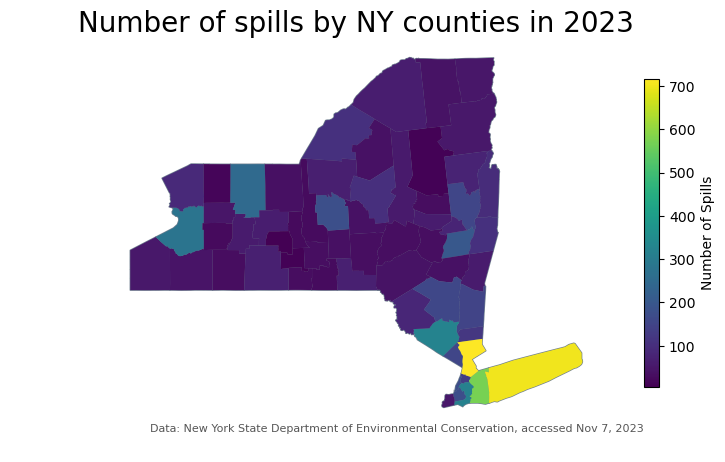

In [158]:
# your code here

fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')
#countries.plot(ax=ax)


ny_counties_map.plot(ax=ax,
            color='none',
            edgecolor = 'slategray')


ny_counties_gpd.plot(ax=ax,
                      column='n_spills',
                        legend=True,
                       legend_kwds={"shrink":.8,
                                    'label': "Number of Spills"
                                    })

ax.set_title('Number of spills by NY counties in 2023',  fontsize=20)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.annotate("Data: New York State Department of Environmental Conservation, accessed Nov 7, 2023", 
            xy=(0.15, .06), # position
            xycoords='figure fraction', 
            fontsize=8, 
            color='#555555')

plt.show()



## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.